In [1]:
#For data
import numpy as np
import pandas as pd

In [2]:
#For Charts
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [5]:
df = pd.read_csv("/content/customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df = df.copy()
df['Age'] = 2025 - df['Year_Birth']
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']
df['TotalSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [9]:
df_cluster = df[['Income', 'Age', 'TotalChildren', 'Recency', 'TotalSpent']].dropna()
df_cluster

,Income,Age,TotalChildren,Recency,TotalSpent
0,58138.0,68,0,58,1617
1,46344.0,71,2,38,27
2,71613.0,60,0,26,776
3,26646.0,41,1,26,53
4,58293.0,44,1,94,422
...,...,...,...,...,...
2235,61223.0,58,1,46,1341
2236,64014.0,79,3,56,444
2237,56981.0,44,0,91,1241
2238,69245.0,69,1,8,843


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

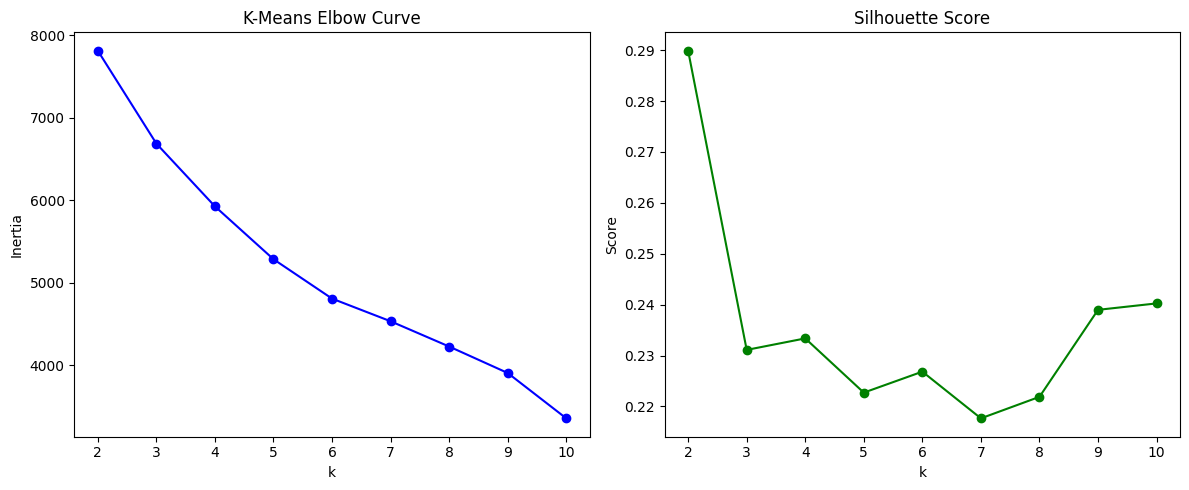

In [8]:
#1. Find Customer segments using K-means clustering algorithm.
inertia = []
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow + silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.title('K-Means Elbow Curve')
plt.xlabel('k'), plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('k'), plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

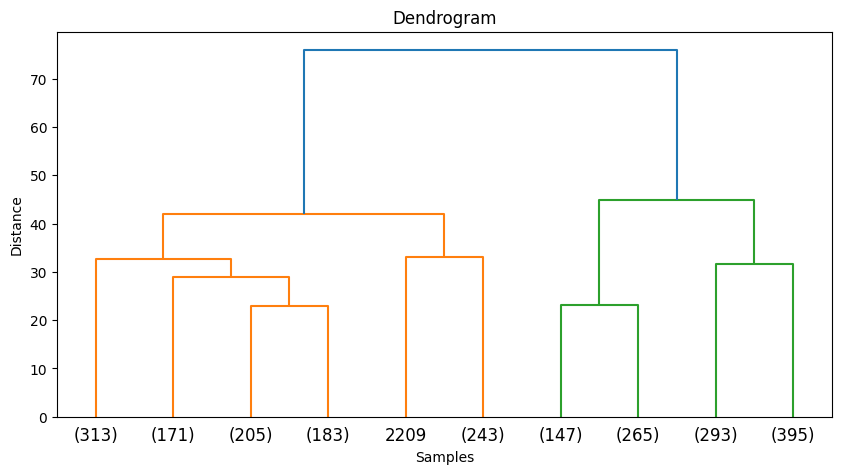

In [ ]:
# 2. Find Customer segments using Hierarchical clustering algorithm.
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
df_cluster['Hierarchical_Cluster'] = fcluster(linked, t=4, criterion='maxclust')

In [ ]:
#3. Compare the Clusters and conclude your analysis.
print(df_cluster[['KMeans_Cluster','Hierarchical_Cluster']].value_counts())

KMeans_Cluster  Hierarchical_Cluster
0               4                       663
2               1                       530
3               3                       410
1               1                       242
                2                       241
0               1                        59
3               1                        41
2               4                        23
1               4                         2
0               3                         2
2               2                         2
0               2                         1
Name: count, dtype: int64
